### General Instructions

Do not change the file name, method name or any variable name in your submission file. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student number below.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Also, ensure that your notebook does not give errors before submitting. Ensure there is no 'Assertion Error', 'NotImplementedError' or  test(s) failed  feedback. 

NotImplementedError: this means there is a code cell/task you are yet to implement.

AssertionError: this means your implementation is failing some tests.

Note that your assignment will be checked with additional test cases after submission. Ensure you work with the instructions given




In [1]:
NAME = "Yaseen"
STUDENT_NUMBER = "1827555"

---

# <center>  COMS4054A/COMS7066A </center>
# <center> Natural Language Processing/Technology (NLP) 2022 </center>
## <center> Lab Session 4 </center>
### <center> 01 September, 2022 </center>

# Sentiment Classification Using Naive Bayes

(30 Marks)

### Objectives

The goal of this session is to have a practical engagement on the topics discussed in Lecture 4.
- Build a Naive Bayes Classifier from scratch
- Build a Naive Bayes Classifier with Scikit-Learn
- Perfom evaluation using metrics from Scikit-Learn

### Task Outline
[Task 1](#task1) (5 points)

[Task 2](#task2) (3 points)

[Task 3](#task3) (8 points)

[Task 4](#task4) (8 points)

[Task 5](#task5) (6 points)

### Summary
We'll be using labelled tweets from the nltk 'twitter_samples' dataset to perform the task of sentiment analysis.
There are two classes, positive sentiment and negative sentiment.

Tweets from the 'positive_tweets.json' belong to the positive class while tweets in 'negative_tweets.json' belong to the negative class. 

#### Required Packages and Data

- Import required packages
- Download required data

Take note of the several packages from the 'nltk' and 'sklearn' being used.


In [2]:
import nltk
import string
import re
import numpy as np
import sklearn


from nltk.corpus import stopwords, twitter_samples
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB


nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/yaseen/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yaseen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Explore the Data

Take your time to explore and understand the data

In [3]:
# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


In [4]:
all_positive_tweets[1]

'@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!'

In [5]:
len(all_positive_tweets)

5000

### Preprocessing our data
You do not have to perform any task here. Read through the code to understand what is going on (Tasks performed in previous labs).
- We use regular expressions to remove certain portions of the tweet we do not need for sentiment analysis
- We remove stop words
- We remove punctuations
- Perform stemming

In [6]:
def process_tweet(tweet):
    '''
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    '''
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [7]:
all_positive_tweets_clean = []
all_negative_tweets_clean = []

for tw in all_positive_tweets:
    all_positive_tweets_clean.append(process_tweet(tw))
    
for tv in all_negative_tweets:
    all_negative_tweets_clean.append(process_tweet(tv))
    
print(len(all_positive_tweets_clean))
print(len(all_negative_tweets_clean))

 

5000
5000




Sample tweet before and after cleaning



In [8]:
print(all_positive_tweets[5])
print(all_positive_tweets_clean[5])

@BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM
['one', 'irresist', ':)', 'flipkartfashionfriday']


### Split data for training and testing

In [9]:
# split the data into two pieces, one for training and one for testing
train_pos = all_positive_tweets_clean[:4000]
train_neg = all_negative_tweets_clean[:4000]

test_pos = all_positive_tweets_clean[4000:]
test_neg = all_negative_tweets_clean[4000:]


train_x = train_pos + train_neg
test_x = test_pos + test_neg

# putting 1 as label for the positve tweets, and 0 as label for negative tweets.
train_y = np.append(np.ones(len(train_pos),dtype=int), np.zeros(len(train_neg),dtype=int))
test_y = np.append(np.ones(len(test_pos),dtype=int), np.zeros(len(test_neg),dtype=int))

### Task 1 - Extract Vocabulary  <a id='task1'></a>
(5 points)
Write a function to get all unique words from the training data.
- The function takes inthe training data (train_x)
- The function returns a list containing all unique words.

In [10]:
def get_vocabulary(train_data):
    vocab = []
    # YOUR CODE HERE
    for tweet in train_data:
        vocab.extend(set(tweet))
    
    vocab = np.unique(vocab)
    return vocab

In [11]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
vocab = get_vocabulary(train_x)
assert len(vocab)== 9162, "Task 1 test(s) failed"
print ("Test passed.")

Test passed.


In [12]:
#IGNORE THIS CELL, PERFORMING BACKGROUND TASKS

In [13]:
#IGNORE THIS CELL, PERFORMING BACKGROUND TASKS

### Task 2 - Calculate the prior for both the positive and negative classes <a id='task2'> </a> 
(3 points)

Using the formula given (also see slides 46, 47 of Lecture note 4), write a function that calculates the prior probailities of the two classes.

Your function takes in the number of positive tweets (no_positive), the number of negative tweets (no_negative) and the total number of tweets (no_total) .

Your function should return the prior probability of the positive class (prior_pos) and the prior probability of the negative  class (prior_neg) .

![title](task2.png)

In [14]:
#No of documents in classes
no_positive = len(train_pos)
no_negative = len(train_neg)
no_total = no_positive + no_negative

def calc_prior(no_positive, no_negative, no_total):
    
    # YOUR CODE HERE
    prior_pos = no_positive/no_total
    prior_neg = no_negative/no_total

    
    return prior_pos, prior_neg

In [15]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
prior_pos, prior_neg = calc_prior(no_positive, no_negative, no_total)
assert prior_pos == 0.5, "Task 1 (prior_pos) test(s) failed"
assert prior_neg == 0.5, "Task 1 (prior_neg) test(s) failed"
print ("Test passed.")

Test passed.


### Task 3 - Calculating Word Frequencies <a id='task3'></a>
(8 points)

Write a function to calulate the frequency of words in the tweets of the positive and negative classes.

The function takes in the preprocessed tweets as a list of list 'tweets', and a list containing the corresponding classes of the respective tweets, 'classes'.

The function will return  a dictionary.
The key of the dictionary is a tuple, (word,class). For example ('contact', 1); 'contact' is the word and '1' is the class. The value of the dictionary is an integer containing the count of the given word in the given class.

An item in the dictionary would look like this:  <b>('followfriday', 1): 23 </b>

Note: 1 - represents the positive class; 0 - represents the negative class.

In [16]:
def count_word_frequency(tweets, classes):
    """Args:
    tweets: list of list"""
    freq_dict = {}
    n = len(classes)
    ## loop through each tweet
    for i in range(n):
        tweet = tweets[i]
        ## Create list of the class for each word in the tweet
        class_val_each_word = [classes[i]]*len(tweet)
        ## Create a tuple for each word and the class it corresponds to
        word_class = list(zip(tweet,class_val_each_word))
        ## Loop through tuple of (word,class) and add it to dictionary
        for word in word_class:
            freq_dict[word] = freq_dict.get(word,0) + 1

    return freq_dict
    

In [17]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
freq_dicts = count_word_frequency(train_x, train_y)
assert len(freq_dicts) == 11428, "Task 3 test failed"
print("Test passed")

Test passed


In [18]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
assert freq_dicts[(('littl', 1))] == 29, "Task 3 test failed"
print("Test passed")

Test passed


In [19]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
assert freq_dicts[('actual', 0)] == 20, "Task 3 test failed"
print("Test passed")

Test passed


In [20]:
#IGNORE THIS CELL, PERFORMING BACKGROUND TASKS

In [21]:
#IGNORE THIS CELL, PERFORMING BACKGROUND TASKS

### Task 4 - Calculate and store the probabilities of all words <a id='task4'></a>

(8 points)

Write a function to calculate the likelihood probability for every (word,class) combination. The function returns a dictionary that stores the probabilities for all (word,class) combinations. For an item in the dictionary, the key is (word,class) and the value is the probability. In other words, for every word in the vocabulary, there should be (word,0) and (word,1) keys in the dictionary.

Your function should use add-k smoothing such that if a (word,class) combination does not exist in the training data, it does not return 0.

Your function should use the freqency dictionary obtained from Task 3.

See the formula or go to Slide 48 of Lecture note 4.

![task4](task4.png)

In [22]:
def calc_prob(freq_dicts,vocab,k=1):
    
    #k=1 assumes we are using add-1 smoothing, but any value of k should be work.
    prob_dict = {}
 
   #calculating the total word count for both classes
    wp =0
    for i in train_pos:
        wp+=len(i)

    total_word_count_in_pos_doc = wp

    wn =0
    for j in train_neg:
        wn+=len(j)

    total_word_count_in_neg_doc = wn
    
    # YOUR CODE HERE
    n = len(vocab)
    for word in vocab:
        pos_class= (word,1)
        neg_class= (word,0)
        count_word_given_pos_class = freq_dicts.get(pos_class,0)
        count_word_given_neg_class = freq_dicts.get(neg_class,0)

        prob_dict[pos_class] = (count_word_given_pos_class+k)/(wp+(k*n))
        prob_dict[neg_class] = (count_word_given_neg_class+k)/(wn+(k*n))

    return prob_dict
        
    

In [23]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
prob_dict = calc_prob(freq_dicts,vocab)
assert len(prob_dict) == 18324, "Task 4 test failed"
print("Test passed")


Test passed


In [24]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
assert round(prob_dict[("thank", 0)],4) == 0.0026, "Task 4 test failed"
print("Test passed")

Test passed


In [25]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
assert round(prob_dict[("thank", 1)],4) == 0.0142, "Task 4 test failed"
print("Test passed")

Test passed


In [26]:
#IGNORE THIS CELL, PERFORMING BACKGROUND TASKS

In [27]:
#IGNORE THIS CELL, PERFORMING BACKGROUND TASKS

### Task 5 - Now Calculate the probability of a tweet in a given class <a id='task5'></a>

(6 points)

The function takes in a preprocessed tweet (tweet), the probability dictionary (prob_dict), the prior probabilities (prior_pos, prior_neg) and the vocabulary (vocab).

The function returns the probabilty that the tweet has a positive sentiment (prob_pos) and the probability that it has a negative sentiment (prob_neg).

Calculate and return the probability using the <b>log values</b>.

Remember to drop words not in the vocabulary (see slide 38 of Lecture note 4).

![image](task5.png)

In [28]:
def predict_class(tweet, prior_pos, prior_neg, prob_dict, vocab):
    # YOUR CODE HERE
    prob_pos = np.log(prior_pos)
    prob_neg =np.log(prior_neg)
    for word in tweet:
        if word not in vocab:
            continue
        else:
            prob_pos += np.log(prob_dict[(word,1)])
            prob_neg += np.log(prob_dict[(word,0)])
        
    return prob_pos, prob_neg

In [29]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
tweet = all_negative_tweets[4697]
tweet = process_tweet(tweet)
predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab)
assert round(predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab)[0],6) == -63.265148, "Task 5  test failed"
assert round(predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab)[1],6) == -59.252061, "Task 5  test failed"
print("Test passed")

Test passed


In [30]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
tweet = test_x[99]
#tweet = process_tweet(tweet)
assert round(predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab)[0],6) == -28.464555, "Task 5  test failed"
assert round(predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab)[1],6) == -38.890164, "Task 5  test failed"

#assert predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab) == (-28.464555232239988, -38.89016390478924), "Task 5  test failed"
print("Test passed")

Test passed


In [31]:
# RUN THIS CELL TO TEST YOUR CODE/FUNCTION
tweet = test_x[456]
print(test_y[456])
#tweet = process_tweet(tweet)

assert round(predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab)[0],6) == -89.890796, "Task 5  test failed"
assert round(predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab)[1],6) == -99.691162, "Task 5  test failed"

#assert predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab) == (-89.8907961722186, -99.69116175808675), "Task 5  test failed"
print("Test passed")

1
Test passed


In [32]:
#IGNORE THIS CELL, PERFORMING BACKGROUND TASKS

In [33]:
#IGNORE THIS CELL, PERFORMING BACKGROUND TASKS

#### Let's predict the class of a given tweet.

This code predicts 1 if the probaility of the positive class is greater than the probability of the negative class and 0 otherwise.

It then prints out the prediction along with the actual class of each tweet. 


### Ungraded Task (contributes to your participation score)
Can you view any tweet that was incorrectly predicted? What do you think was responsible for the incorrect prediction.

Give the tweet, the predicted sentiment/class, the actual sentiment/class and your reason for the incorrect prediction.

Give your response in the appropriate discussion forum, more details at the end of the lab.

In [34]:
#Run this code to get your y_pred=[]
y_pred=[]
for i,y in zip(test_x, test_y):
    result = predict_class(i,prior_pos, prior_neg,prob_dict,vocab)
    if result[0] > result[1]:
        pred = 1
    else:
        pred = 0
        
    print(pred,y)
    y_pred.append(pred)
        

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


In [35]:
incorrect_prediction_indices = np.where(np.equal(y_pred, test_y)== False)

In [36]:
print(test_x[incorrect_prediction_indices[0][4]])
print(y_pred[incorrect_prediction_indices[0][4]])
print(test_y[incorrect_prediction_indices[0][4]])

['uff', 'itna', 'miss', 'karhi', 'thi', 'ap', ':p']
0
1


### Predict your tweets

Type in your tweet in the place of 'She cried' and see what ouput you get.

In [37]:
tweet = process_tweet("I hate that everyone is sad")
result = predict_class(tweet,prior_pos, prior_neg,prob_dict,vocab)
print("Positive prob:",result[0])
print("Negative prob:",result[1])
if result[0] > result[1]:
    print("Positive tweet")
else:
    print("Negative tweet")

Positive prob: -24.302247747104005
Negative prob: -20.8035827030555
Negative tweet


### Evaluation
Let's calculate different evaluation metrics using in built methods from sklearn.

Read up on the evaluation metrics and ensure you understand how to use them.

Some helpful links:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html



In [38]:
accuracy_score(test_y,y_pred)

0.9955

In [39]:
precision_recall_fscore_support(test_y,y_pred,average="binary")

(0.995995995995996, 0.995, 0.9954977488744372, None)

In [40]:
confusion_matrix(test_y,y_pred)

array([[996,   4],
       [  5, 995]])

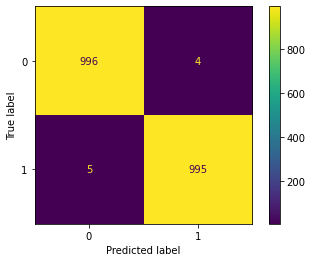

In [41]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred)

### We can calculate the scores manually too.

The confusin matrix gives us the counts of true and false positives and negatives.

Watch out for how the matrix is labelled.

In [42]:
recall = 995/(995+5)
recall

0.995

In [43]:
precision = 995/(995+4)
precision

0.995995995995996

In [44]:
accuracy = (995+996)/(995+996+4+5)

In [45]:
accuracy

0.9955

### Using pre-built methods from sklearn to build our Naive Bayes sentiment classifier.

Look up the methods used and read the inline comments between the code.

In [46]:
all_tweets = all_positive_tweets + all_negative_tweets

# We need to process our text into numeric form which can be used by the classifier.
# Machine learning models require numeric text
# We use the CountVectorizer class to do this
# It takes the text and returns a count for each time a word present in the corpus appears in a tweet -  a bag of words model
# We'll discuss more on this in our next class

count_vec = CountVectorizer() 

# the method returns a bag of words model, 
all_tweets_vector = count_vec.fit_transform(all_tweets)

# convert the bag of words model into a dense array usable by the model
all_tweets_vector_dense = np.array(all_tweets_vector.todense())

# this contains our features 
X = all_tweets_vector_dense 

#our target variable to be predicted
y = np.append(np.ones(len(all_positive_tweets)),np.zeros(len(all_negative_tweets))) 

# creating our train and test data. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.9)


# Using the Multinomial Naive Bayes model from sklearn
# method fit trains/fits the model, using our training data
model = MultinomialNB().fit(X_train, y_train)

# getting the predictions from the trained model
y_pred = model.predict(X_test)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.6903333333333334
F1 score: 0.719420114768952


### Ungraded Question (contributes to your participation score)

Why is the accuracy obtained by using the sklearn MultinomialDB class different from what we obtained from our programmed classifier?

How can we improve either of the classifiers? 

### Instructions - Ungraded Questions
Attempting any of the ungraded questions in this lab would count for 2 points towards your participation score.

Do not answer your question in the notebook, as it would not be graded here.

Put in your response in the discussion forum (under Lecture 4) on Moodle for it to be seen.